# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

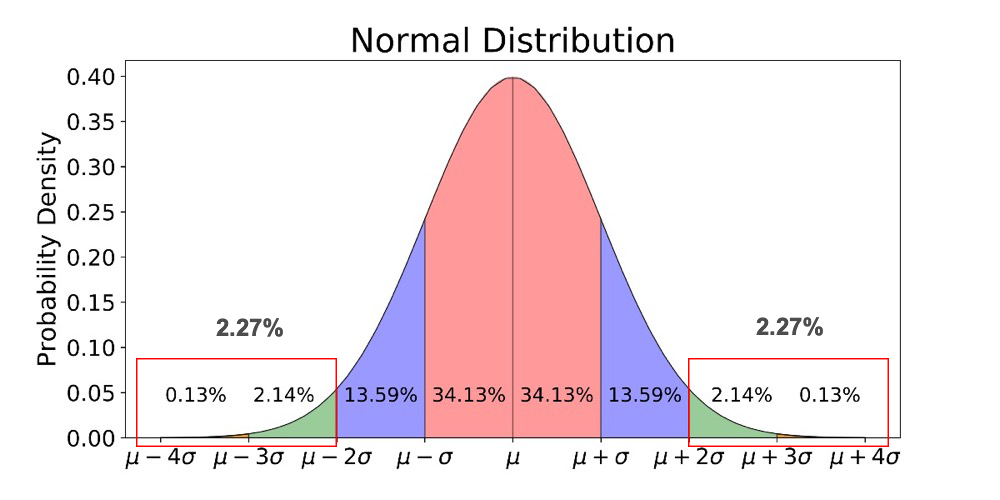

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 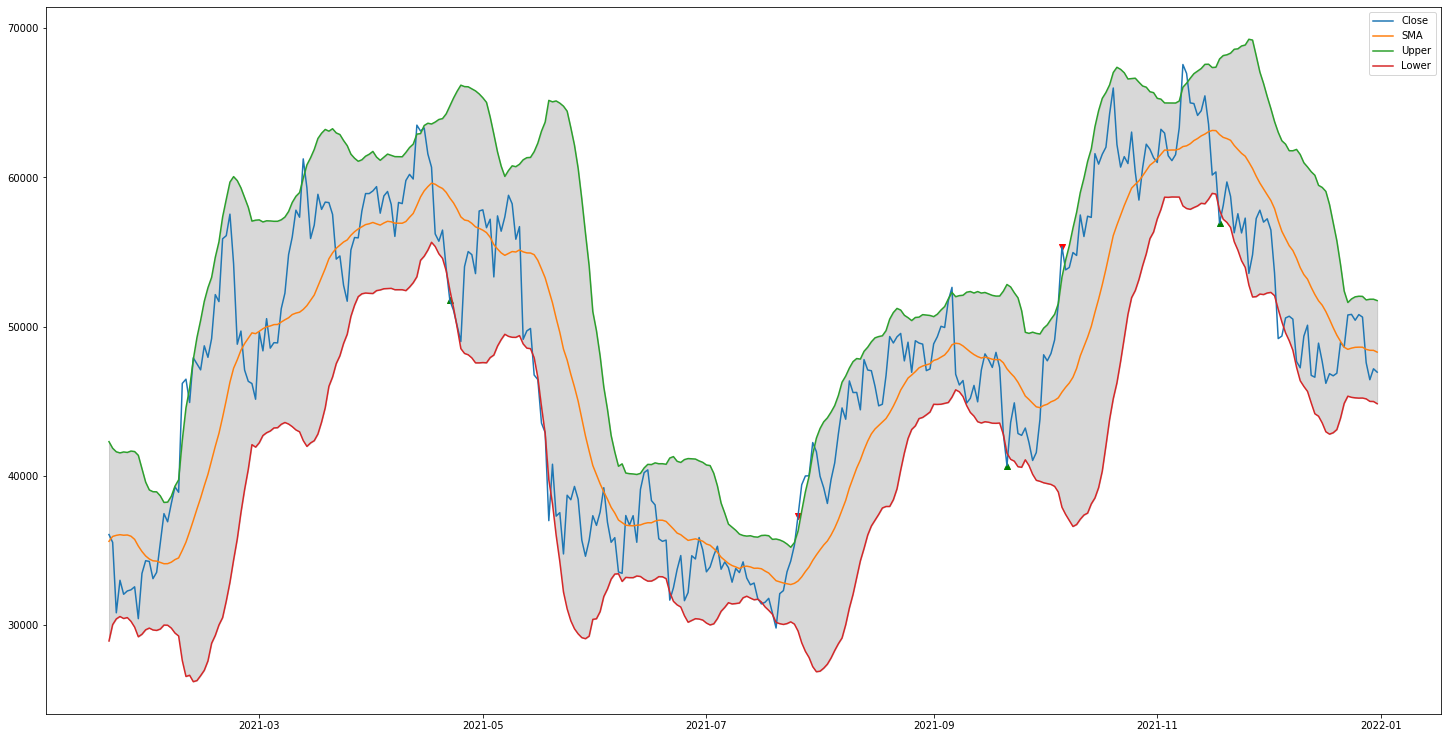

# -------------------------------------------------------------------------

# TESLA Stock Price
## Get Stock Data from yfinance (every day for 1 year)

In [9]:
#pip install yfinance
#install essentials library

In [23]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

#ticker for tesla is TSLA
data = yf.download(tickers = ('TSLA'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-15,852.000000,859.900024,819.099976,826.159973,38777600
2021-01-19,837.799988,850.000000,833.000000,844.549988,25367000
2021-01-20,858.739990,859.500000,837.280029,850.450012,25665900
2021-01-21,855.000000,855.719971,841.419983,844.989990,20521100
2021-01-22,834.309998,848.000000,828.619995,846.640015,20066500
...,...,...,...,...,...
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,30605000
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,22021100
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,27913000


In [24]:
## Simple Moving Average (SMA) for 30 days
df['SMA'] = df.Close.rolling(window=45).mean()

## standard deviations for 30 days
df['stddev'] = df.Close.rolling(window=45).std()

## Upper is 1 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + (2.2 * df.stddev)
df['Lower'] = df.SMA - (2.2 * df.stddev)

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-03-22,684.590027,699.619995,668.750000,670.000000,39512200,760.022442,88.763404,955.301932,564.742952,False,False
2021-03-23,675.770020,677.799988,657.510010,662.159973,30491900,756.377998,89.351025,952.950252,559.805743,False,False
2021-03-24,667.909973,668.020020,630.109985,630.270020,33795200,751.616220,90.250562,950.167458,553.064983,False,False
2021-03-25,613.000000,645.500000,609.500000,640.390015,39224900,746.948220,90.454635,945.948418,547.948023,False,False
2021-03-26,641.869995,643.820007,599.890015,618.710022,33852800,741.919777,91.167281,942.487795,541.351759,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,30605000,1060.275549,71.470405,1217.510440,903.040658,False,False
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,22021100,1056.771328,67.087689,1204.364244,909.178413,False,False
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,27913000,1055.510885,65.563164,1199.749846,911.271923,False,False


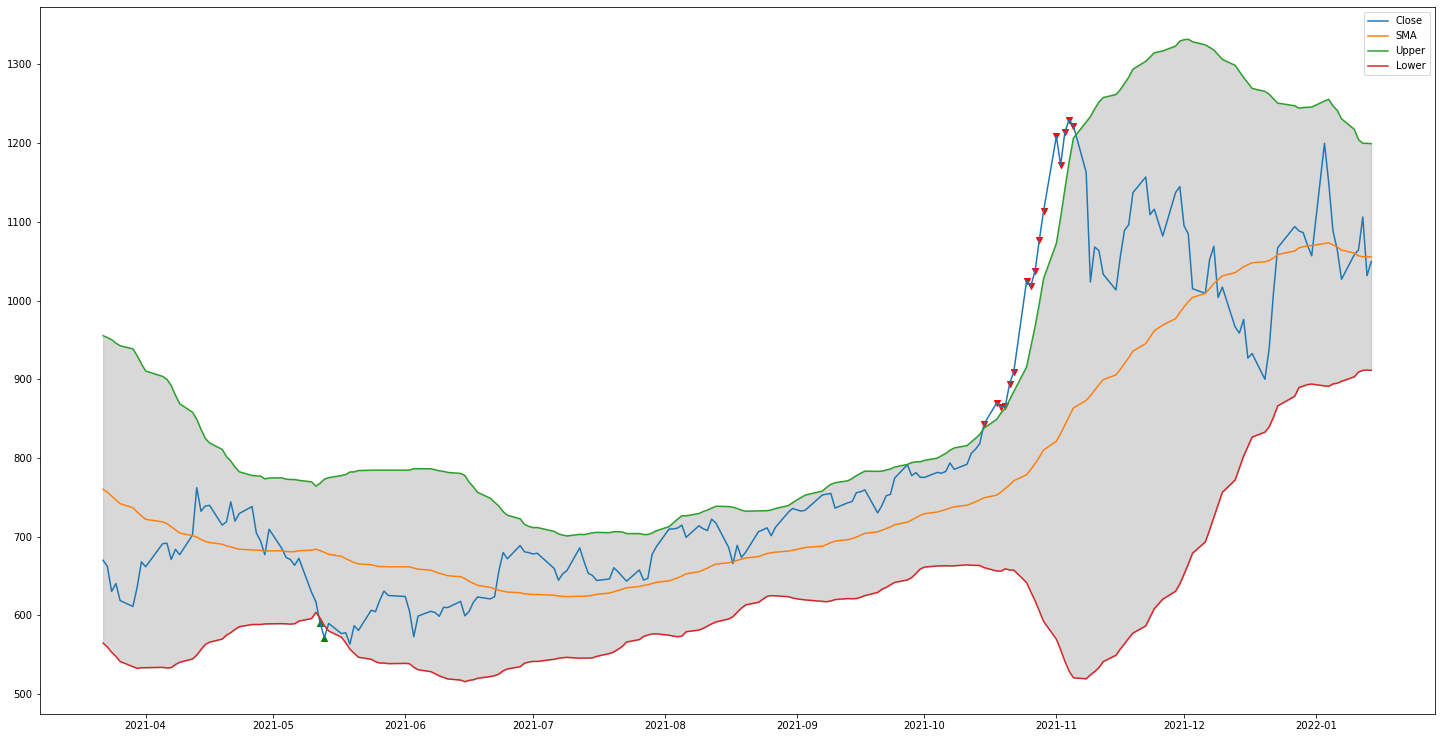

In [25]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [26]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

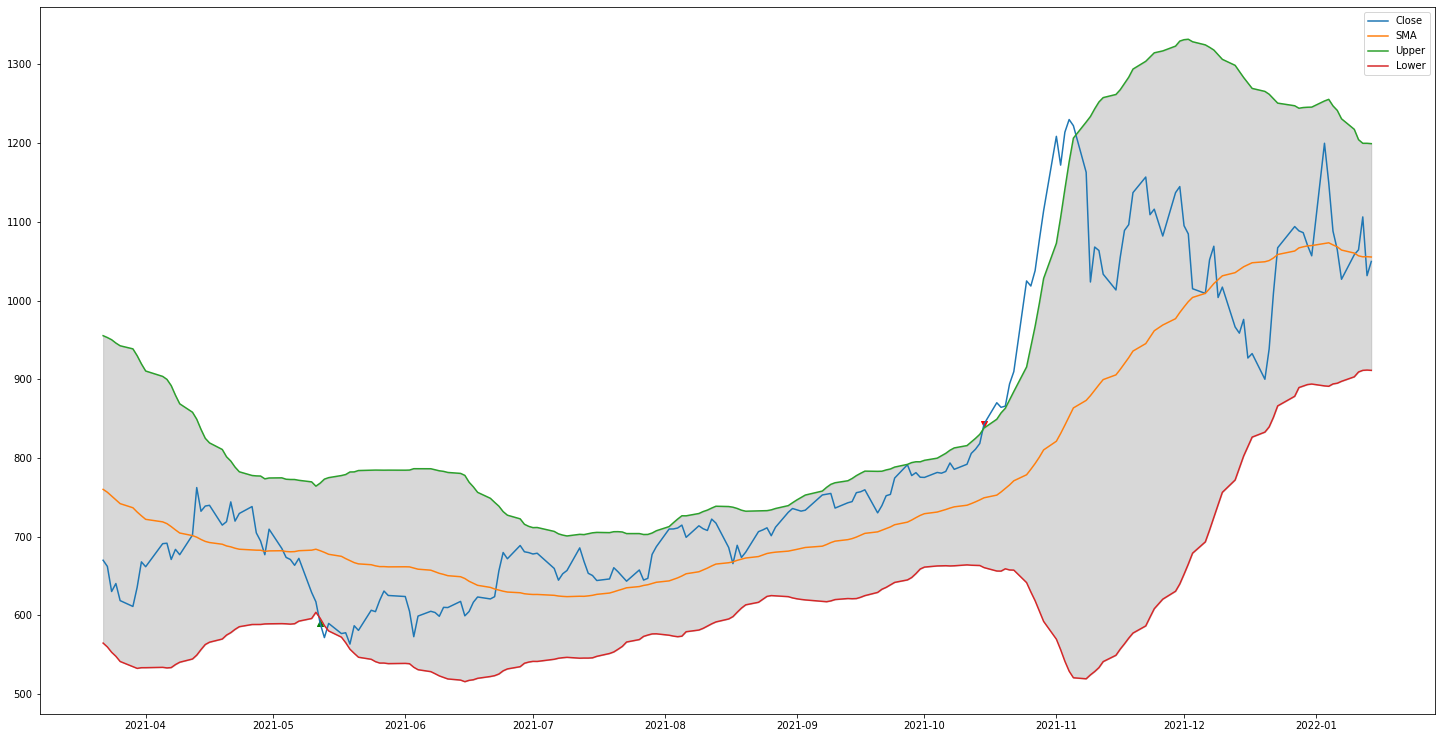

In [27]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [28]:
#bought 1000 shares of stock
#initial profit is 0
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

253140.0146484375